In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math


### **Теоритическая плотность экпоненциального распределения**

на примере экспоненциального распределения

In [0]:
# генерация выборки 

l = 0.0125 # параметр распределения

# параметры выборки
value = 1000
n = 15

rv = sts.expon()            # функция
sample = rv.rvs(value)      # генерация случайной выборки 1000 значений
x = np.linspace(l,n,value)  # определение массива точек для построения плотности распределения
pdf = rv.pdf(x)             # вычисление значения плотности распределения от выборки - pdf

In [3]:
#подсчет показателей

E = 1/l                        # Мат. ожидание
D = (math.sqrt(1/l**2))**2     # Дисперсия

print('E[x]=',E, ' ', 'D[x]=',D)

E[x]= 80.0   D[x]= 6400.0


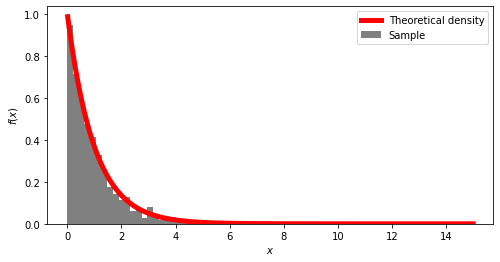

In [4]:
# построение гистрограммы выборки и теоретической функции распределения

fig, axes = plt.subplots(figsize=(8,4))
plt.plot(x, pdf, color='red', linewidth = 5, label='Theoretical density')
plt.hist(sample, bins = 'auto', density = True, color='grey', label='Sample')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

> *гистограмма выборки хорошо совпадает с теоретической оценкой плотности вероятности рассматриваемого распределения.*



## Распределение выборочного среднего случайной величины при разных объёмах выборок


In [0]:
# функция выборочных средних по выборкам объема n

def generate_pdf(n): 
  # выборочные средние по выборкам объема n
  means = []
  for _ in range(1000):
    sample = rv.rvs(n)
    sample_mean = np.mean(sample)
    means.append(sample_mean)
  # pdf  
  norm_rv = sts.norm(loc=1, scale=(1./n) ** 0.5)
  x = np.linspace(0,4,100)
  pdf = norm_rv.pdf(x)
  
  # построение гистограммы
  plt.plot(x, pdf, linewidth = 2, label='Theoretical density')
  plt.hist(means, bins = 'auto', density = True, label='Sample')
  plt.xlabel('$\\bar{X}_n$')
  plt.ylabel('$f(\\bar{X}_n)$')
  plt.title('n = %d' % n)
  plt.legend()
  plt.show()

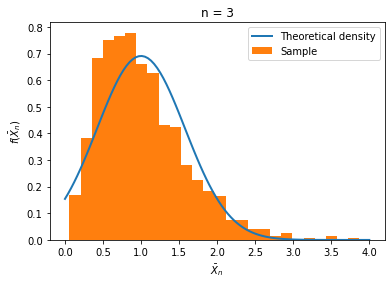

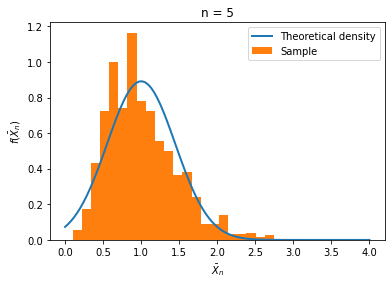

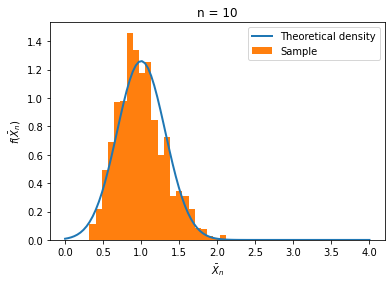

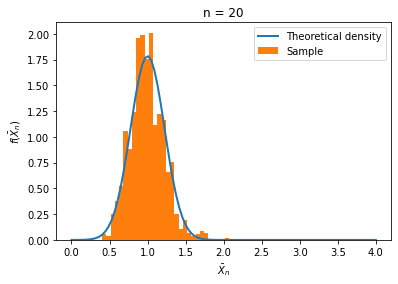

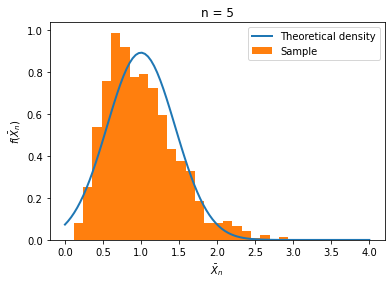

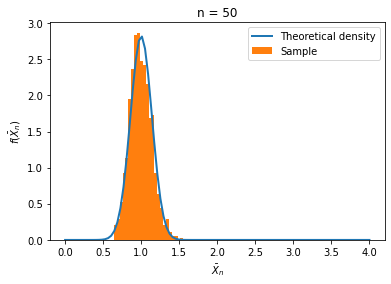

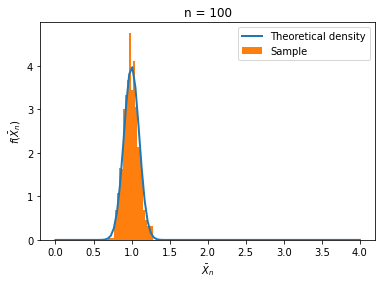

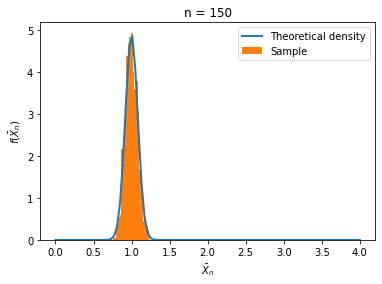

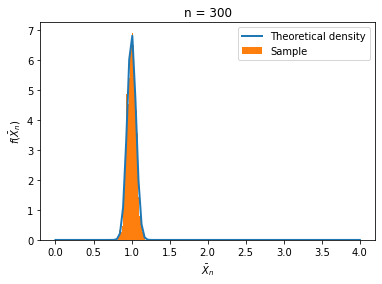

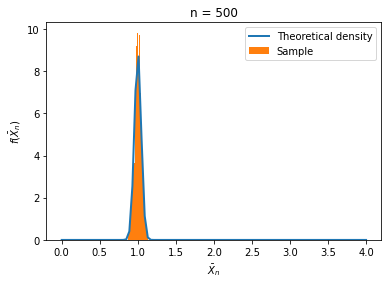

In [6]:
for n in [3, 5, 10, 20, 5,50,100,150,300,500]:
  generate_pdf(n)



> *при n=3 распределение несимметрично и не похоже на нормальное; чем больше объем выборки n, тем лучше распределение выборочных средних соответствует приближающему его нормальному распределению; начиная с n=50 распределение выборочных средних достаточно хорошо соответсвует нормальному*

